<img src="download.png" width=1200 height=1200 />

# <span style="color:red"><strong>Jamboree Education - Linear Regression</strong></span>

Jamboree has helped thousands of students like you make it to top colleges abroad. Be it GMAT, GRE or SAT, their unique problem-solving methods ensure maximum scores with minimum effort.
They recently launched a feature where students/learners can come to their website and check their probability of getting into the IVY league college. This feature estimates the chances of graduate admission from an Indian perspective.

## **Problem statement:**
Your analysis will help Jamboree in understanding what factors are important in graduate admissions and how these factors are interrelated among themselves. It will also help predict one's chances of admission given the rest of the variables.

## **Column Profiling:**
- Serial No. (Unique row ID)
- GRE Scores (out of 340)
- TOEFL Scores (out of 120)
- University Rating (out of 5)
- Statement of Purpose and Letter of Recommendation Strength (out of 5)
- Undergraduate GPA (out of 10)
- Research Experience (either 0 or 1)
- Chance of Admit (ranging from 0 to 1)

In [1]:
#Importing all the required libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats
import warnings

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"Jamboree_Admission.csv")

In [3]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


### <span style="color:seagreen"><strong>Insights:</strong></span>
- University Rating, SOP, LOR , Research are categorical columns and GRE Score, TOEFL Score, CGPA are numerical column with target column Chance of Admit

In [5]:
df.drop(columns = ["Serial No."], inplace= True)

### <span style="color:seagreen"><strong>Insights:</strong></span>
- First column i.e. 'Serial No.' which was observed as unique row identifier which was dropped and was not required for model buildingry.

In [6]:
# Rename columns
df.columns = [col.strip().replace(' ', '_') for col in df.columns]

In [7]:
df.columns

Index(['GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance_of_Admit'],
      dtype='object')

In [8]:
#  Number oof unique values in each features:
df.nunique()

GRE_Score             49
TOEFL_Score           29
University_Rating      5
SOP                    9
LOR                    9
CGPA                 184
Research               2
Chance_of_Admit       61
dtype: int64

### <span style="color:seagreen"><strong>Insights:</strong></span>
- From the above we can observe that;
- University_Rating, SOP, LOR, and Research are categorical variables as the number of unique values are very small in number.
- Rest of the other features are numeric , and ordinal .
- Except for (University Rating,SOP,LOR,Research are discrete) and rest are continuous
- Also if SOP , University rating , LOR and research can be considered as numeric ordinal data.

In [9]:
cat_cols = ['University_Rating', 'SOP', 'LOR', 'Research']
num_cols = ['GRE_Score', 'TOEFL_Score', 'CGPA']
target = 'Chance_of_Admit'

In [10]:
df_dict = {'University_Rating' : 'category' ,'Research' : 'category' }

df = df.astype(df_dict)

In [11]:
df.describe()

,GRE_Score,TOEFL_Score,SOP,LOR,CGPA,Chance_of_Admit
count,500.000000,500.000000,500.000000,500.00000,500.000000,500.00000
mean,316.472000,107.192000,3.374000,3.48400,8.576440,0.72174
std,11.295148,6.081868,0.991004,0.92545,0.604813,0.14114
min,290.000000,92.000000,1.000000,1.00000,6.800000,0.34000
25%,308.000000,103.000000,2.500000,3.00000,8.127500,0.63000
50%,317.000000,107.000000,3.500000,3.50000,8.560000,0.72000
75%,325.000000,112.000000,4.000000,4.00000,9.040000,0.82000
max,340.000000,120.000000,5.000000,5.00000,9.920000,0.97000


In [12]:
##for cateory columns
df.describe(include = ['category'])

,University_Rating,Research
count,500,500
unique,5,2
top,3,1
freq,162,280


In [13]:
# Checking the duplicate values in the dataset
df.duplicated().sum()

0

### <span style="color:seagreen"><strong>Insights:</strong></span>
- There is no duplicate values

In [14]:
# check for missing values
df.isnull().sum()

GRE_Score            0
TOEFL_Score          0
University_Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance_of_Admit      0
dtype: int64

### <span style="color:seagreen"><strong>Insights:</strong></span>
- There is no null values in columns

# **`Univariate Analysis`**

In [15]:
# Checking unique no. of values of all the continuous variables
col_name_plots = ['GRE_Score', 'TOEFL_Score', 'CGPA', 'Chance_of_Admit']

col_unique =[]
for col in col_name_plots:
    col_unique.append(df[col].nunique())

col_uni_df =pd.DataFrame({'Columns':col_name_plots, 'No_of_Unique_values':col_unique})
col_uni_df

,Columns,No_of_Unique_values
0,GRE_Score,49
1,TOEFL_Score,29
2,CGPA,184
3,Chance_of_Admit,61


In [16]:
for col in col_name_plots:
    print(col, '\n')
    print(df[col].value_counts(bins=5,normalize=True), '\n')

GRE_Score 

(310.0, 320.0]      0.308
(320.0, 330.0]      0.282
(300.0, 310.0]      0.192
(330.0, 340.0]      0.112
(289.949, 300.0]    0.106
Name: proportion, dtype: float64 

TOEFL_Score 

(108.8, 114.4]               0.296
(103.2, 108.8]               0.282
(97.6, 103.2]                0.252
(114.4, 120.0]               0.128
(91.97099999999999, 97.6]    0.042
Name: proportion, dtype: float64 

CGPA 

(8.048, 8.672]                0.350
(8.672, 9.296]                0.312
(7.424, 8.048]                0.192
(9.296, 9.92]                 0.122
(6.795999999999999, 7.424]    0.024
Name: proportion, dtype: float64 

Chance_of_Admit 

(0.718, 0.844]    0.310
(0.592, 0.718]    0.282
(0.844, 0.97]     0.218
(0.466, 0.592]    0.142
(0.338, 0.466]    0.048
Name: proportion, dtype: float64 



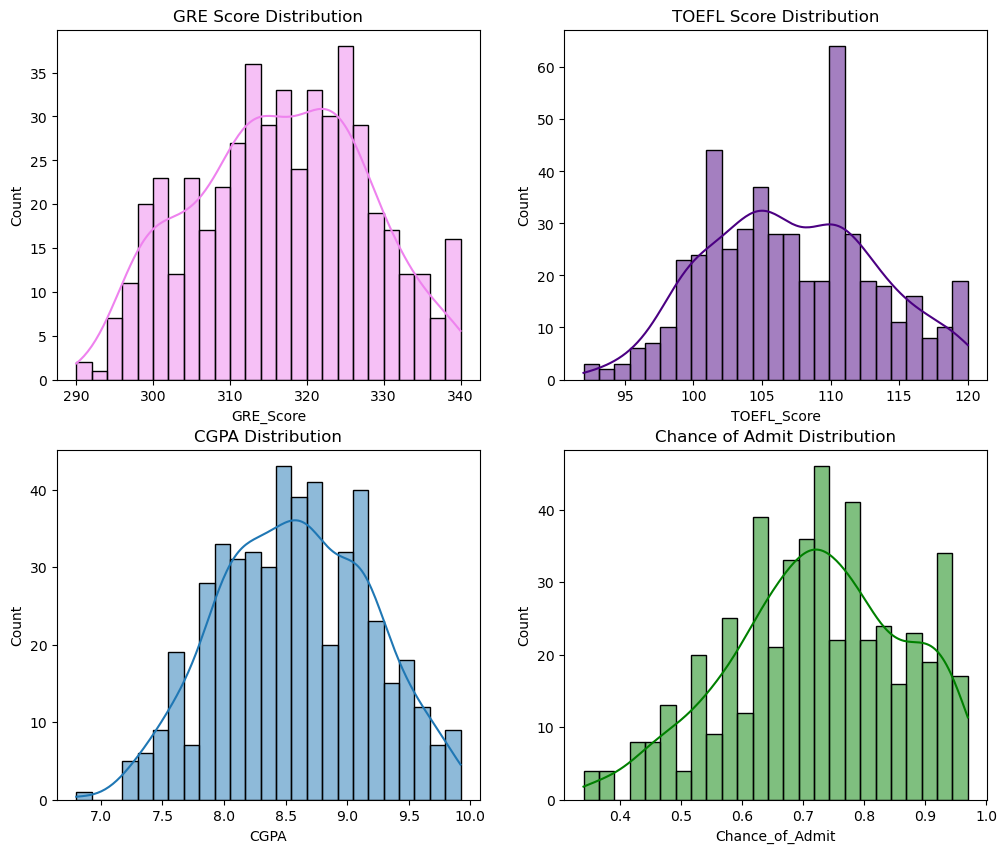

In [17]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
sns.histplot(df['GRE_Score'],kde = True ,ax=ax[0, 0],bins = 25 ,color='violet').set_title('GRE Score Distribution')
sns.histplot(df['TOEFL_Score'],kde = True , ax=ax[0, 1],bins = 25 , color='indigo').set_title('TOEFL Score Distribution')
sns.histplot(df['CGPA'],kde = True ,bins = 25, ax=ax[1, 0]).set_title('CGPA Distribution')
sns.histplot(df['Chance_of_Admit'],kde = True ,bins = 25 , ax=ax[1, 1], color='green').set_title('Chance of Admit Distribution')
plt.show()

### <span style="color:seagreen"><strong>Insights:</strong></span>
- Almost 58% of students have GRE Score between 310-330
- Almost 57% of students have TOEFL Score between 103-115
- 65% of students have CGPA between 8.05-9.30
- Almost 60% of students have Chance of Admit between 60-85%

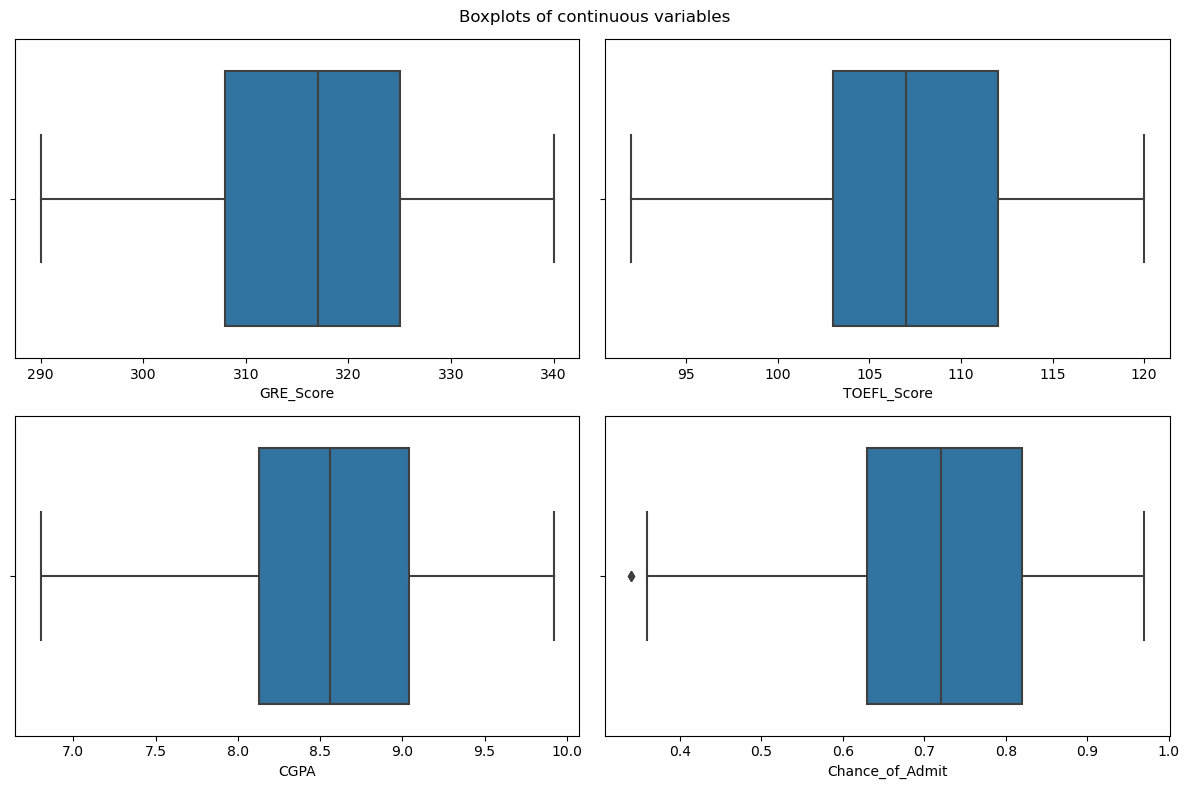

In [18]:
# Plotting boxplot plots of all the continuous variables for outliers presence
fig, axs = plt.subplots(nrows=2, ncols=2,figsize=(12,8))
fig.suptitle('Boxplots of continuous variables')

for col, axe in zip(col_name_plots, axs.flatten()):
  sns.boxplot(data=df,x=col,ax=axe)

plt.tight_layout()
plt.show()

### <span style="color:seagreen"><strong>Insights:</strong></span>
- No outliers for GRE Score,TOEFL Score and CGPA.
- Just one outlier in Change of Admit

In [19]:
# check unique values in categorical variables
cat_col_name_plots = ['University_Rating', 'SOP', 'LOR', 'Research']

cat_col_unique =[]
for col in cat_col_name_plots:
    cat_col_unique.append(df[col].nunique())

cat_col_uni_df =pd.DataFrame({'Columns':cat_col_name_plots, 'No_of_Unique_values':cat_col_unique})
cat_col_uni_df

,Columns,No_of_Unique_values
0,University_Rating,5
1,SOP,9
2,LOR,9
3,Research,2


In [20]:
for col in cat_col_name_plots:
    print(col, '\n')
    print(df[col].value_counts(bins=4,normalize=True), '\n')

University_Rating 

(2.0, 3.0]      0.324
(0.995, 2.0]    0.320
(3.0, 4.0]      0.210
(4.0, 5.0]      0.146
Name: proportion, dtype: float64 

SOP 

(3.0, 4.0]      0.354
(2.0, 3.0]      0.288
(4.0, 5.0]      0.210
(0.995, 2.0]    0.148
Name: proportion, dtype: float64 

LOR 

(3.0, 4.0]      0.360
(2.0, 3.0]      0.298
(4.0, 5.0]      0.226
(0.995, 2.0]    0.116
Name: proportion, dtype: float64 

Research 

(0.75, 1.0]       0.56
(-0.002, 0.25]    0.44
(0.25, 0.5]       0.00
(0.5, 0.75]       0.00
Name: proportion, dtype: float64 



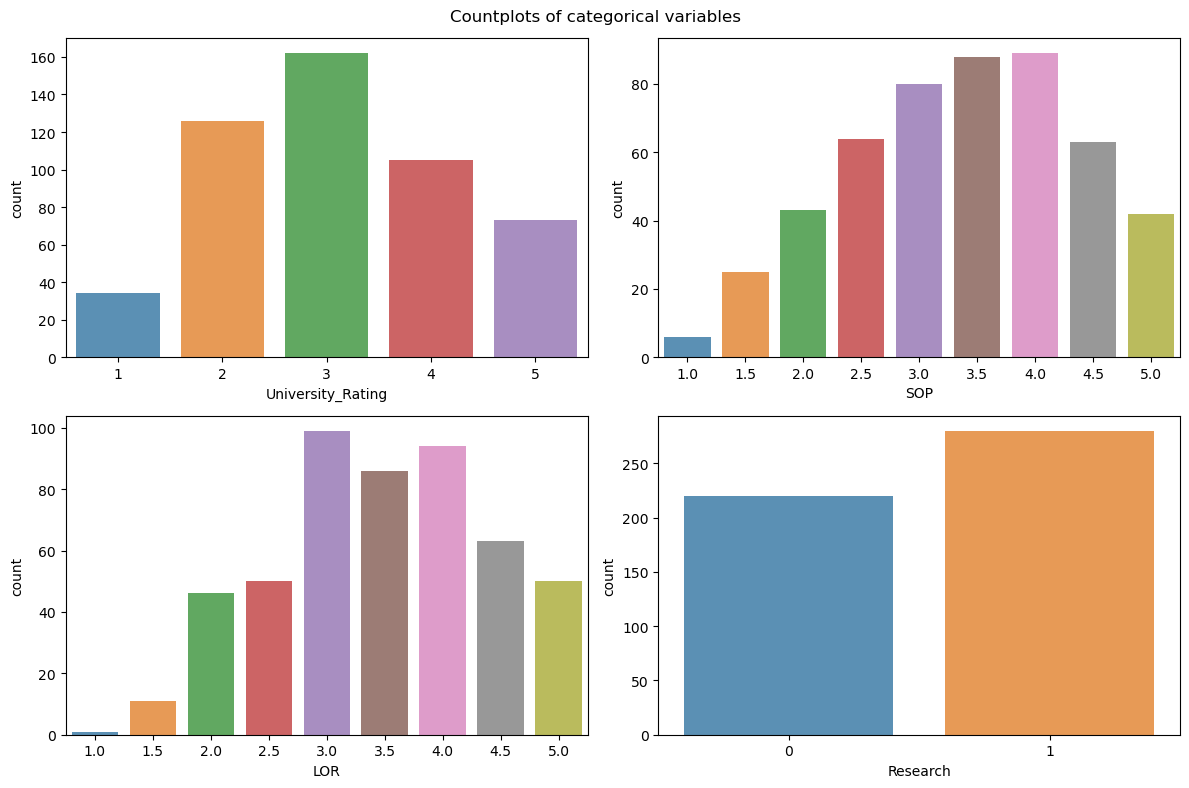

In [21]:
fig, axs = plt.subplots(nrows=2, ncols=2,figsize=(12,8))
fig.suptitle('Countplots of categorical variables')

for col, axe in zip(cat_col_name_plots, axs.flatten()):
  sns.countplot(data=df,x=col,ax=axe,alpha=0.8)

plt.tight_layout()
plt.show()

### <span style="color:seagreen"><strong>Insights:</strong></span>
- Almost 65% of students have LOR between 2-4
- Almost 63% of students have SOP between 2-4
- Almost 65% of students have University Rating between 1-3

# **`Bivariate  Analysis`**

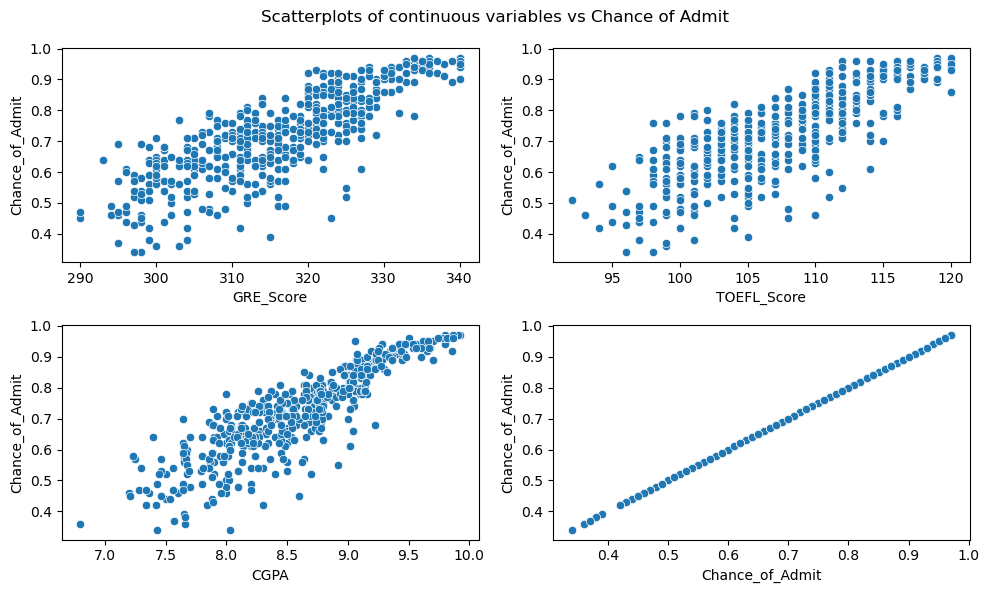

In [22]:
# Plotting scatterplots of continuous variables w.r.t. Chance of Admit
fig, axs = plt.subplots(nrows=2, ncols=2,figsize=(10,6))
fig.suptitle('Scatterplots of continuous variables vs Chance of Admit')

for col, axe in zip(col_name_plots, axs.flatten()):
    sns.scatterplot(data=df, x=col, y=target, ax=axe)

plt.tight_layout()
plt.show()

### <span style="color:seagreen"><strong>Insights:</strong></span>
- GRE Score, TOEFL Score and CGPA have positive linear correlation with Chance of Admit

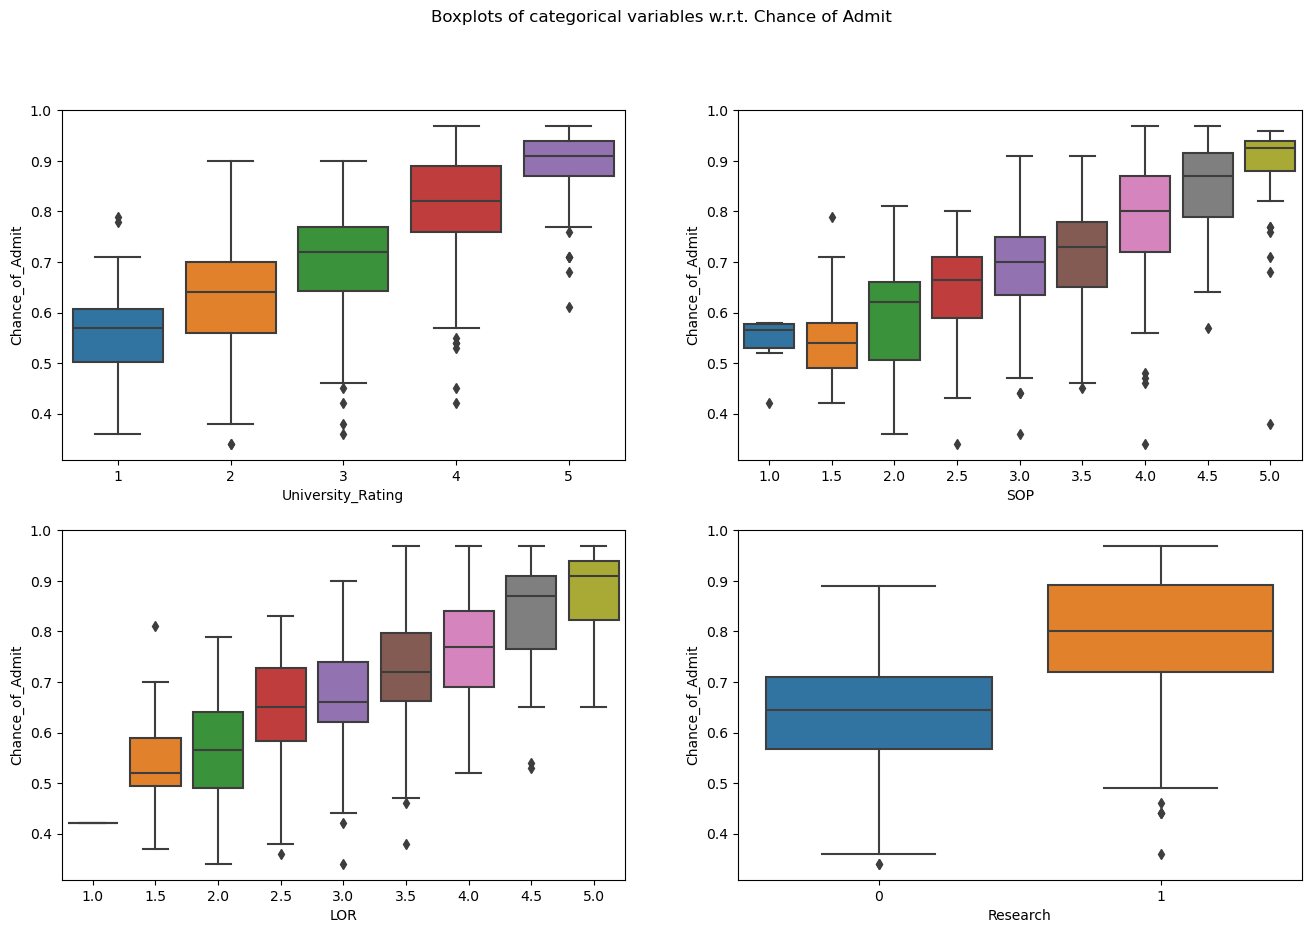

In [23]:
rows, cols = 2,2
fig, axs = plt.subplots(rows, cols, figsize=(16,10))
fig.suptitle('Boxplots of categorical variables w.r.t. Chance of Admit')

index = 0
for row in range(rows):
    for col in range(cols):
        sns.boxplot(x=cat_col_name_plots[index], y='Chance_of_Admit', data=df, ax=axs[row,col])
        index += 1

### <span style="color:seagreen"><strong>Insights:</strong></span>
- As we can observe that as rating for University, SOP and LOR increases Chance of Admit also increases.
- And if the students have research experience then Chance of Admit is also higher.

# **`Multivariate Analysis`**

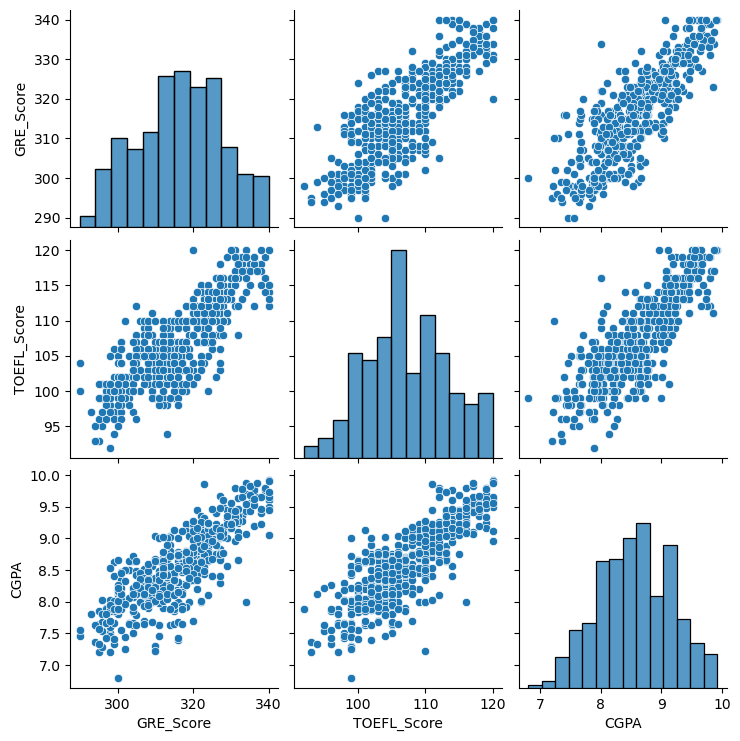

In [24]:
sns.pairplot(df[num_cols])
plt.show()

In [25]:
## Finding correlation between all the features
df.corr().round(3)

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
GRE_Score,1.000,0.827,0.635,0.613,0.525,0.826,0.563,0.810
TOEFL_Score,0.827,1.000,0.650,0.644,0.542,0.811,0.467,0.792
University_Rating,0.635,0.650,1.000,0.728,0.609,0.705,0.427,0.690
SOP,0.613,0.644,0.728,1.000,0.664,0.712,0.408,0.684
LOR,0.525,0.542,0.609,0.664,1.000,0.637,0.373,0.645
CGPA,0.826,0.811,0.705,0.712,0.637,1.000,0.501,0.882
Research,0.563,0.467,0.427,0.408,0.373,0.501,1.000,0.546
Chance_of_Admit,0.810,0.792,0.690,0.684,0.645,0.882,0.546,1.000


In [26]:
df.corr()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
GRE_Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL_Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University_Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance_of_Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


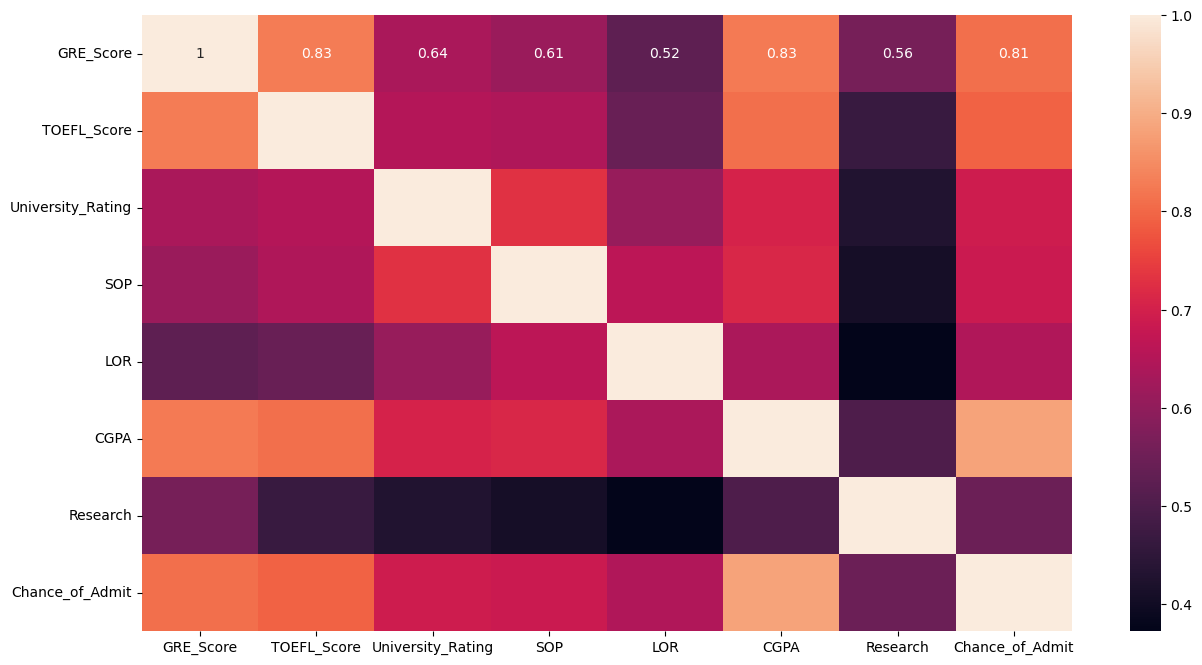

In [27]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True)
plt.show()

### <span style="color:seagreen"><strong>Insights:</strong></span>
- CGPA and Change of Admit correlation = 0.88
- GRE Score and Change of Admit correlation = 0.81
- TOEFL Score and Change of Admit correlation = 0.79
- CGPA and GRE Score correlation = 0.83
- CGPA and TOEFL Score correlation = 0.81
- If the students has good CGPA and he/she will have good GRE and TOEFL Score and therefore Chance of admission increases.

# **`Data Preprocessing`**

In [28]:
# Separating features and target variable
x = df.drop(['Chance_of_Admit'],axis=1)
y = df['Chance_of_Admit']

In [29]:
# Splitting of data into train and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [30]:
print('Shape of x_train',x_train.shape)
print('Shape of y_train',y_train.shape)
print('Shape of x_test',x_test.shape)
print('Shape of y_test',y_test.shape)

Shape of x_train (350, 7)
Shape of y_train (350,)
Shape of x_test (150, 7)
Shape of y_test (150,)


In [31]:
# n = no. of data points/samples
# d = no. of features

n = y.shape[0]
d = x.shape[1]
col = x_train.columns
print('No. of samples: ',n)
print('No. of features: ',d)

No. of samples:  500
No. of features:  7


In [32]:
# Scaling the data
scaler=StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [33]:
print(x_train.shape, x_train.shape)
print(x_test.shape, y_test.shape)

(350, 7) (350, 7)
(150, 7) (150,)


# **`Model Building`**

In [34]:
# Adjusted R2 function
def adj_r2(R2,x):
  n = x.shape[0]
  d = x.shape[1]
  adj_R2 = 1-((1- R2)*(n-1)/(n-d-1))
  return adj_R2

# Model fitting
def model_fit(mod,x1,x2,y1,y2):
  model = mod
  model.fit(x1,y1)

  y_pred_train = model.predict(x1)
  y_pred_test = model.predict(x2)

  weights = np.round(model.coef_,3)
  intercept = np.round(model.intercept_,3)
  R2_train = model.score(x1,y1)
  R2_test = model.score(x2,y2)

  return (y_pred_train, y_pred_test, weights, intercept, R2_train, R2_test)

# Metrics of the data
def metrics(x,y1,y2,R2):
  MAE = mean_absolute_error(y1, y2)
  print("MAE: ", np.round(MAE,3))

  MSE = mean_squared_error(y1, y2)
  print("MSE: ", np.round(MSE,3))

  RMSE = np.sqrt(MSE)
  print("RMSE: ", np.round(RMSE,3))

  print("R2: ", np.round(R2,3))

  adj_R2 = adj_r2(R2,x)
  print("Adjusted R2: ", np.round(adj_R2,3))

def weights_display(weights,intercept):
  # Model weights and Bias
  print('\n')
  weights_df = pd.DataFrame({'Columns':col,'Weights_of_columns':weights})
  print(weights_df,'\n')

  print('Model intercept: ',intercept)

  # Visualising weights of the features
  plt.figure(figsize=(6,4))
  sns.barplot(data=weights_df,x='Columns',y='Weights_of_columns')
  plt.xticks(rotation=90)
  plt.show()

Model: Linear Regression 

Metrics of train data 

MAE:  0.041
MSE:  0.003
RMSE:  0.058
R2:  0.821
Adjusted R2:  0.817


Metrics of test data 

MAE:  0.044
MSE:  0.004
RMSE:  0.064
R2:  0.816
Adjusted R2:  0.807


             Columns  Weights_of_columns
0          GRE_Score               0.019
1        TOEFL_Score               0.023
2  University_Rating               0.011
3                SOP              -0.001
4                LOR               0.013
5               CGPA               0.063
6           Research               0.014 

Model intercept:  0.725


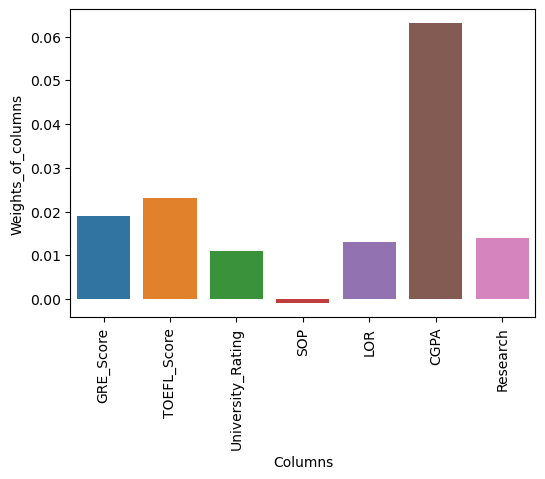

In [35]:
# Fitting of Linear regression model
print('Model: Linear Regression','\n')
y_pred_train, y_pred_test, weights, intercept, R2_train, R2_test = model_fit(LinearRegression(), x_train_scaled, x_test_scaled, y_train, y_test)
print('Metrics of train data','\n')
metrics(x_train_scaled, y_train, y_pred_train, R2_train)
print('\n')
print('Metrics of test data','\n')
metrics(x_test_scaled, y_test, y_pred_test, R2_test)
weights_display(weights,intercept)

### <span style="color:seagreen"><strong>Insights:</strong></span>
- As R2_score and Adjusted_R2_score of training data and as well as test data are same that implies that there is no overfitting of the model.

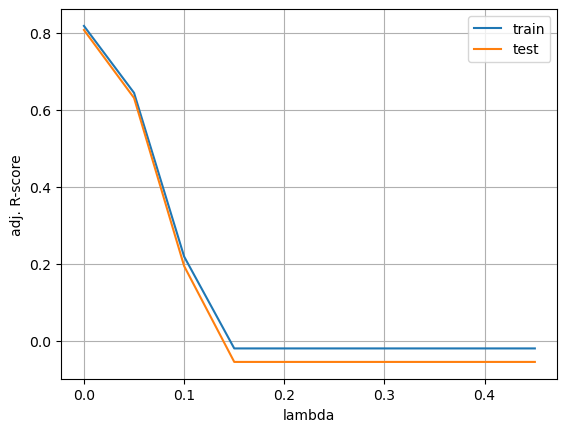

Best lamda:  0.0001


In [36]:
lamda = np.arange(0.0001,0.5,0.05)
train_scores=[]
test_scores=[]
for i in range(len(lamda)):
   y_pred_train, y_pred_test, weights, intercept, R2_train, R2_test = model_fit(Lasso(alpha=lamda[i]), x_train_scaled, x_test_scaled, y_train, y_test)
   train_scores.append(adj_r2(R2_train,x_train_scaled))
   test_scores.append(adj_r2(R2_test,x_test_scaled))


plt.figure()
plt.plot(lamda, train_scores, label="train")
plt.plot(lamda, test_scores, label="test")
plt.legend()
plt.xlabel("lambda")
plt.ylabel("adj. R-score")
plt.grid()
plt.show()

best_lamda = lamda[np.argmax(test_scores)]
print('Best lamda: ',best_lamda)

Model: Linear Regression with Regularization : Lasso 

Metrics of train data 

MAE:  0.041
MSE:  0.003
RMSE:  0.058
R2:  0.821
Adjusted R2:  0.817


Metrics of test data 

MAE:  0.044
MSE:  0.004
RMSE:  0.064
R2:  0.816
Adjusted R2:  0.807


             Columns  Weights_of_columns
0          GRE_Score               0.019
1        TOEFL_Score               0.023
2  University_Rating               0.011
3                SOP              -0.000
4                LOR               0.013
5               CGPA               0.063
6           Research               0.014 

Model intercept:  0.725


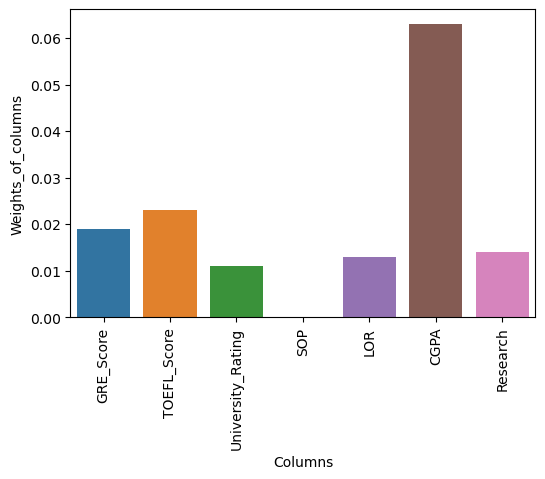

In [37]:
# Fitting of Lasso model
print('Model: Linear Regression with Regularization : Lasso','\n')
y_pred_train, y_pred_test, weights, intercept, R2_train, R2_test = model_fit(Lasso(alpha=best_lamda), x_train_scaled, x_test_scaled, y_train, y_test)
print('Metrics of train data','\n')
metrics(x_train_scaled, y_train, y_pred_train, R2_train)
print('\n')
print('Metrics of test data','\n')
metrics(x_test_scaled, y_test, y_pred_test, R2_test)
weights_display(weights,intercept)

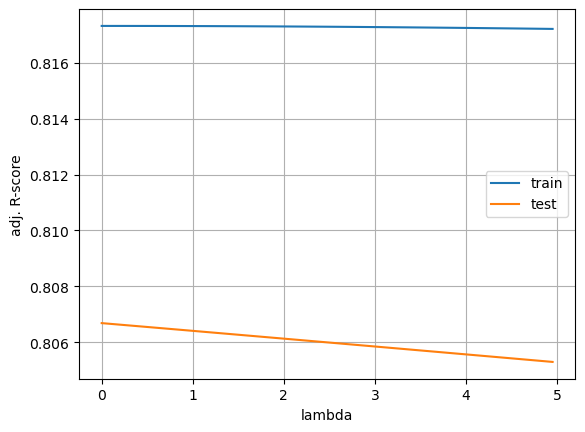

Best lamda:  0.0001


In [38]:
lamda = np.arange(0.0001,5,0.05)
train_scores=[]
test_scores=[]
for i in range(len(lamda)):
   y_pred_train, y_pred_test, weights, intercept, R2_train, R2_test = model_fit(Ridge(alpha=lamda[i]), x_train_scaled, x_test_scaled, y_train, y_test)
   train_scores.append(adj_r2(R2_train,x_train_scaled))
   test_scores.append(adj_r2(R2_test,x_test_scaled))


plt.figure()
plt.plot(lamda, train_scores, label="train")
plt.plot(lamda, test_scores, label="test")
plt.legend()
plt.xlabel("lambda")
plt.ylabel("adj. R-score")
plt.grid()
plt.show()

best_lamda = lamda[np.argmax(test_scores)]
print('Best lamda: ',best_lamda)

Model: Linear Regression with Regularization : Ridge 

Metrics of train data 

MAE:  0.041
MSE:  0.003
RMSE:  0.058
R2:  0.821
Adjusted R2:  0.817


Metrics of test data 

MAE:  0.044
MSE:  0.004
RMSE:  0.064
R2:  0.816
Adjusted R2:  0.807


             Columns  Weights_of_columns
0          GRE_Score               0.019
1        TOEFL_Score               0.023
2  University_Rating               0.011
3                SOP              -0.001
4                LOR               0.013
5               CGPA               0.063
6           Research               0.014 

Model intercept:  0.725


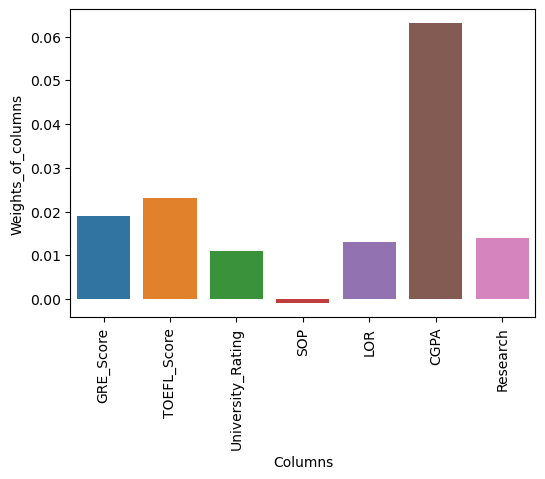

In [39]:
# Fitting of Ridge model
print('Model: Linear Regression with Regularization : Ridge','\n')
y_pred_train, y_pred_test, weights, intercept, R2_train, R2_test = model_fit(Ridge(alpha=best_lamda), x_train_scaled, x_test_scaled, y_train, y_test)
print('Metrics of train data','\n')
metrics(x_train_scaled, y_train, y_pred_train, R2_train)
print('\n')
print('Metrics of test data','\n')
metrics(x_test_scaled, y_test, y_pred_test, R2_test)
weights_display(weights,intercept)

### <span style="color:seagreen"><strong>Insights:</strong></span>
*** For Linear Regression model, Lasso Regression model, Ridge Regression model : ***

CGPA, GRE score and TOEFL Score have the highest weights.

SOP, University rating, Research have the lowest weights.

# **`Testing the assumptions of the linear regression model`**
### *Assumptions of Linear regression:*
1. Assumption of linearity

2. No multicollinearity

3. Normality of residuals

4. No heteroskadasticity

5. No autocorrelation


#### *1. Assumption of linearity*

Linearity of variables says that there is a linear relationship between the independent variables and the target variable. A linear relationship suggests that a change in response Y due to one unit change in X¹ is constant, regardless of the value of X¹.

Linearity can be checked by residual plot :residual vs fitted value. If there is linearity then there should not be any pattern in the residual plot. it should be randomly scattered around zero showing no pattern.

If any type of shape is observed like curved, funnel shape then it can be said that assumption of linearity is not met.

<Axes: ylabel='Chance_of_Admit'>

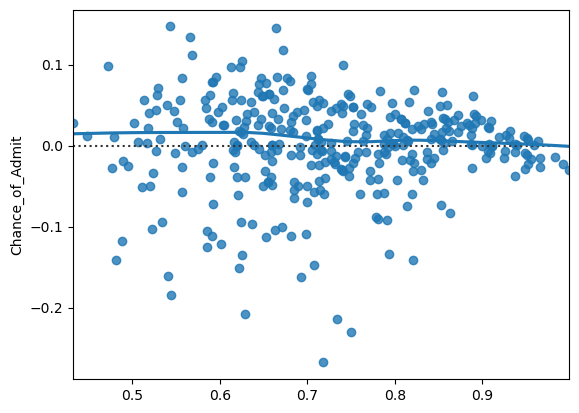

In [40]:
model=LinearRegression()
model.fit(x_train_scaled,y_train)
y_train_pred = model.predict(x_train_scaled)
res = y_train - y_train_pred
sns.residplot(x=y_train_pred,y=res,lowess=True)

From the above plot, we can observe that there is no pattern and can be concluded that it shows linearity.

#### *2. No multicollinearity*

VIF (Variance Inflation Factor) checks for multicollinearity in a regression analysis.

VIF determines the strength of the correlation between the independent variables. It is predicted by taking a variable and regressing it against every other variable. “

or

VIF score of an independent variable represents how well the variable is explained by other independent variables.

VIF(j) = 1 /(1- R(j)^2)

In [41]:
x_t = pd.DataFrame(x_train, columns = x_train.columns)
vif = pd.DataFrame()
vif['Features'] = x_t.columns
vif['VIF'] = [variance_inflation_factor(x_t.values,i) for i in range(x_t.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
print(vif)

            Features      VIF
0          GRE_Score  1354.17
1        TOEFL_Score  1270.06
2  University_Rating    23.46
3                SOP    36.07
4                LOR    30.19
5               CGPA   978.30
6           Research     2.88


In [42]:
# As VIF score is highest for GRE Score so dropping 'GRE Score' column
x_t.drop(columns=['GRE_Score'],inplace=True)
     

In [43]:
# Calculating VIF score again after dropping 'GRE Score' column
vif = pd.DataFrame()
vif['Features'] = x_t.columns
vif['VIF'] = [variance_inflation_factor(x_t.values,i) for i in range(x_t.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
print(vif)

            Features     VIF
0        TOEFL_Score  673.71
1  University_Rating   22.64
2                SOP   34.19
3                LOR   30.01
4               CGPA  750.82
5           Research    2.85


In [44]:
# As VIF score is highest for TOEFL Score so dropping 'TOEFL Score' column
x_t.drop(columns=['TOEFL_Score'],inplace=True)

In [45]:
# Calculating VIF score again after dropping 'TOEFL Score' column
vif = pd.DataFrame()
vif['Features'] = x_t.columns
vif['VIF'] = [variance_inflation_factor(x_t.values,i) for i in range(x_t.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
print(vif)

            Features    VIF
0  University_Rating  22.59
1                SOP  34.17
2                LOR  29.74
3               CGPA  23.47
4           Research   2.81


In [46]:
# Now again train the model with these features
# Splitting of data into train and test data
x_1 = df[['University_Rating','SOP','CGPA','Research']]
y_1 = df['Chance_of_Admit']

x_train_r, x_test_r, y_train_r, y_test_r = train_test_split(x_1,y_1, test_size=0.2, random_state=1)

In [47]:
print('Shape of x_train_r',x_train_r.shape)
print('Shape of y_train_r',y_train_r.shape)
print('Shape of x_test_r',x_test_r.shape)
print('Shape of y_test_r',y_test_r.shape)

Shape of x_train_r (400, 4)
Shape of y_train_r (400,)
Shape of x_test_r (100, 4)
Shape of y_test_r (100,)


In [48]:
# n = no. of data points/samples
# d = no. of features

n = y_1.shape[0]
d = x_1.shape[1]
col = x_train_r.columns
print('No. of samples: ',n)
print('No. of features: ',d)

No. of samples:  500
No. of features:  4


In [49]:
# Scaling the data
scaler=StandardScaler()
x_train_r_scaled = scaler.fit_transform(x_train_r)
x_test_r_scaled = scaler.transform(x_test_r)

Model: Linear Regression 

Metrics of train data 

MAE:  0.046
MSE:  0.004
RMSE:  0.063
R2:  0.799
Adjusted R2:  0.797


Metrics of test data 

MAE:  0.042
MSE:  0.004
RMSE:  0.061
R2:  0.806
Adjusted R2:  0.798


             Columns  Weights_of_columns
0  University_Rating               0.014
1                SOP               0.009
2               CGPA               0.101
3           Research               0.015 

Model intercept:  0.721


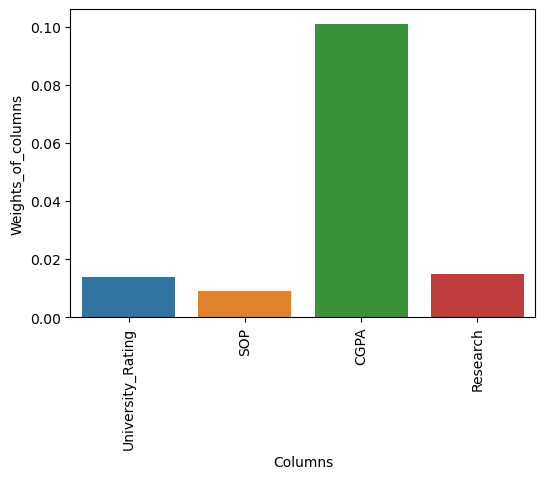

In [50]:
# Fitting of Linear regression model
print('Model: Linear Regression','\n')
y_pred_train, y_pred_test, weights, intercept, R2_train, R2_test = model_fit(LinearRegression(), x_train_r_scaled, x_test_r_scaled, y_train_r, y_test_r)
print('Metrics of train data','\n')
metrics(x_train_r_scaled, y_train_r, y_pred_train, R2_train)
print('\n')
print('Metrics of test data','\n')
metrics(x_test_r_scaled, y_test_r, y_pred_test, R2_test)
weights_display(weights,intercept)

### <span style="color:seagreen"><strong>Insights:</strong></span>
We observe that there is collinearity between GRE score, TOEFL score and CGPA. Correlation heatmap also showed strong positive correlation between GRE score, TOEFL score and CGPA.

Therefore after removing GRE score, TOEFL score columns we dont see much drop in R2 and Adjusted_R2 scores for all the models.

#### *3.Mean of Residuals*

The mean of residuals represents the average of residual values in a regression model.

The mean of residuals helps in understanding whether the regression model is biased or not. If the model is unbiased then mean would be close to zero. If it very far from zero, then we can say that the model would overestimate or underestimate the observed values.

Also from the distribution of the residuals we can conclude whether the model is biased or not.If it shows normal distribution then it is not biased otherwise it is.

In [51]:
res_mean = res.mean()
print(res_mean)
     

-8.881784197001253e-18


### <span style="color:seagreen"><strong>Insights:</strong></span>
As the mean is close to zero that means it is unbiased.

#### *3. Normality of residuals*

Normality of residuals says that the residuals (or errors) in the model are normally distributed.

Normality is important because it allows for statistical tests and the validity of confidence intervals and hypothesis tests.

<Axes: xlabel='Chance_of_Admit', ylabel='Count'>

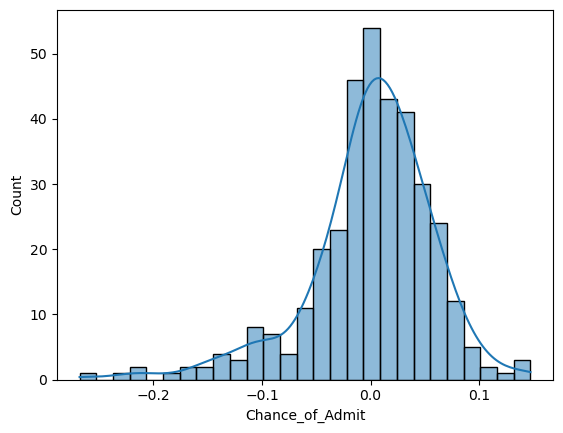

In [52]:
sns.histplot(res,kde=True)

In [53]:
resi = stats.shapiro(res)
resi.statistic

0.9348213076591492

### <span style="color:seagreen"><strong>Insights:</strong></span>
As the distribution of residual is normal and the shapirp statistic is also close to 1 that means normality of residual is there.

#### *4. Heteroskedasticity*

Homoscedasticity refers the spread of the residuals should be similar across different values of the predictors.

To test it scatteplot can be used and if the graph is conical in shape then that means data is not suited for linear regression.

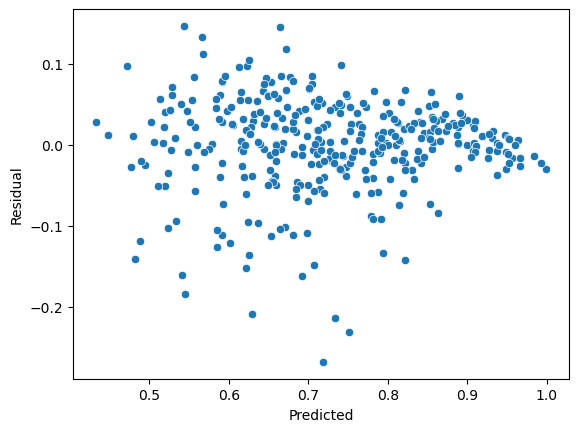

In [54]:
sns.scatterplot(x = y_train_pred, y = res)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.show()

### <span style="color:seagreen"><strong>Insights:</strong></span>
Since the plot is not creating a cone type shape. Hence there is no homoskedasticity present in the data.

#### *5. No Auto-correlation*

The presence of correlation in error terms drastically reduces model’s accuracy. This usually occurs in time series models where the next instant is dependent on previous instant. If the error terms are correlated, the estimated standard errors tend to underestimate the true standard error.

It can be checked by Durbin – Watson (DW) statistic. It must lie between 0 and 4. If DW = 2, implies no autocorrelation, 0 < DW < 2 implies positive autocorrelation while 2 < DW < 4 indicates negative autocorrelation.

In [55]:
from statsmodels.stats.stattools import durbin_watson
durbin_watson(res)

1.981276617032497

### <span style="color:seagreen"><strong>Insights:</strong></span>
As the Durbin – Watson (DW) statistic is almost =2 that means there is no autocorrelation.

##  **`Regression Analysis`**
- From the above bar chart and REPORT file, We can observe that CGPA is the most important feature for predicting the chances of admission.
- Apart from CGPA other important features are GRE and TOEFL score.
- When analysing the assumption for linear regression, check for Multicolinearity, Observation: Getting all the VIF scores below 5 , shows there's no high multicolinearity.
- All the residuals are not perfectly normally distributed. and so residual plot we can observe some level of heteroscedasticity. Our Model shows very similar metrics just like other model metrics.

##  **`Business Insights & Recommendations`**

### <span style="color:seagreen"><strong>🏷️Insights:</strong></span>

- First column was observed as unique row identifier which was dropped and was not required for model building.
  
- University Rating , SOP and LOR strength and research are seems to be discrete random Variables , but also ordinal numeric data.
  
- All the other features are numeric, ordinal and continuous.
  
- No null values were present in data.
  
- No Significant amount of outliers were found in data.sChance of admission(target variable) and GRE score(an independent feature) are nearly normally distribted.
  
- Independent Variables (Input data): GRE Score, TOEFL Score, University Rating, SOP, LOR, CGPA, Research
- Target/Dependent Variable : Chance of Admit (the value we want to predict)
  
- From correlation heatmap , we can observe GRE score, TOEFL score and CGPA have very high correlation with Change of admission.
  
- University rating, SOP ,LOR and Research have comparatively slightly less correlated than other features.
  
- Chances of admit is a probability measure , which is within 0 to 1 which is good (no outliers or missleading data in column).
  
- Range of GRE score looks like between 290 to 340.
  
- Range of TOEFL score is between 92 to 120.
  
- University rating , SOP and LOR are distributed between range of 1 to 5.
  
- CGPA range is between 6.8 to 9.92.
  
- From boxplots (distribution of chance of admition (probability of getting admition) as per GRE score ) : with higher GRE score , there is high probability of getting an admission.
  
- Students having high toefl score , has higher probability of getting admission.
  
- From count plots, we can observe , statement of purpose SOP strength is positively correlated with Chance of Admission.
  
- We can also similar pattern in Letter of Recommendation Stength and University rating , have positive correlation with Chaces of Admission.
  
- Student having research has higher chances of Admission , but also we can observe some outliers within that category.

#### Model Predictors: 
Our analysis identified several key predictors strongly correlated with admission chances. Notably, **GRE score, TOEFL score, and CGPA** emerged as significant factors influencing admission probabilities.
#### Multicollinearity Check: 
Assessing multicollinearity revealed no significant issues, indicating the robustness of our model despite high correlations among predictors.

#### Model Performance:
Both Linear Regression and Ridge Regression models exhibited promising performance, capturing up to approximentally 82% of the variance in admission probabilities.

#### Data Distribution:
Exploratory data analysis uncovered left-skewed distributions in admission probabilities and strong positive correlations between exam scores and admission chances.

## **Recommendations:**

#### Feature Enhancement:
- Encourage students to focus on improving GRE scores, CGPA, and the quality of Letters of Recommendation (LOR), as these factors significantly influence admission chances.
#### Data Augmentation:
- Collect a wider range of data beyond academic metrics to capture applicants' holistic profiles, including extracurricular achievements, personal statements, and diversity factors.
#### Additional Features:
- Given the strong correlation among CGPA, we can enrich the predictive model with additional diverse features such as Research, work experience, internships, or extracurricular activities.

By implementing these recommendations, we can further enhance our admissions process, providing valuable insights and support to both applicants and educational institutions.